In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
sub_df = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")

In [3]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
sub_df.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


# EDA

### EDA: Info of Columns

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


### EDA: NaN Percentage

In [8]:
print("NaN Values in Train Columns")
nan_df = pd.DataFrame()
nan_df["Col"] = train_df.columns
nan_df["Total_NaN"] = train_df.isna().sum().tolist()
nan_df["Percentage_NaN"] = round(nan_df["Total_NaN"] / len(train_df), 4)  * 100
nan_df

NaN Values in Train Columns


,Col,Total_NaN,Percentage_NaN
0,PassengerId,0,0.00
1,HomePlanet,201,2.31
2,CryoSleep,217,2.50
3,Cabin,199,2.29
4,Destination,182,2.09
5,Age,179,2.06
6,VIP,203,2.34
7,RoomService,181,2.08
8,FoodCourt,183,2.11
9,ShoppingMall,208,2.39


In [9]:
print("NaN Values in Test Columns")
nan_df = pd.DataFrame()
nan_df["Col"] = test_df.columns
nan_df["Total_NaN"] = test_df.isna().sum().tolist()
nan_df["Percentage_NaN"] = round(nan_df["Total_NaN"] / len(test_df), 4)  * 100
nan_df

NaN Values in Test Columns


,Col,Total_NaN,Percentage_NaN
0,PassengerId,0,0.00
1,HomePlanet,87,2.03
2,CryoSleep,93,2.17
3,Cabin,100,2.34
4,Destination,92,2.15
5,Age,91,2.13
6,VIP,93,2.17
7,RoomService,82,1.92
8,FoodCourt,106,2.48
9,ShoppingMall,98,2.29


### EDA: Target Y

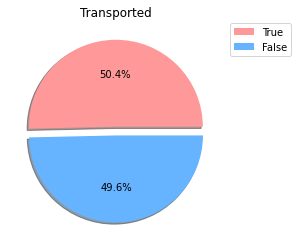

In [10]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
data = train_df["Transported"].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], colors=colors, legend=True, title='Transported', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

### EDA: Numerical Cols - Train Set

In [11]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [12]:
test_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


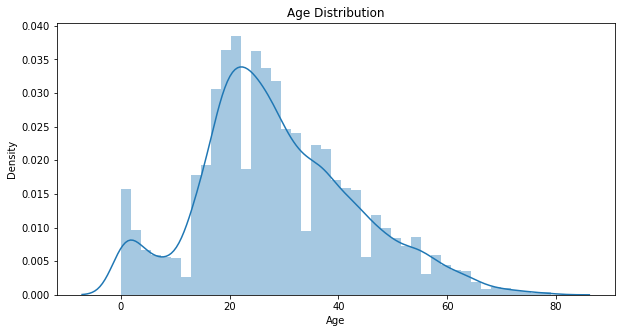

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(train_df["Age"])
plt.title("Age Distribution")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


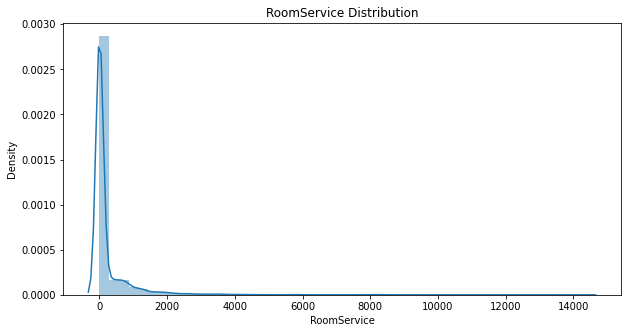

In [14]:
plt.figure(figsize=(10,5))
sns.distplot(train_df["RoomService"])
plt.title("RoomService Distribution")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


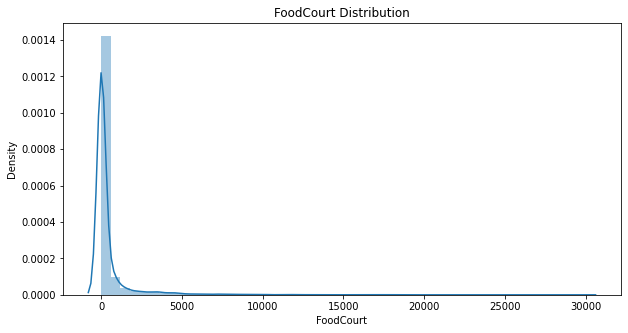

In [15]:
plt.figure(figsize=(10,5))
sns.distplot(train_df["FoodCourt"])
plt.title("FoodCourt Distribution")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


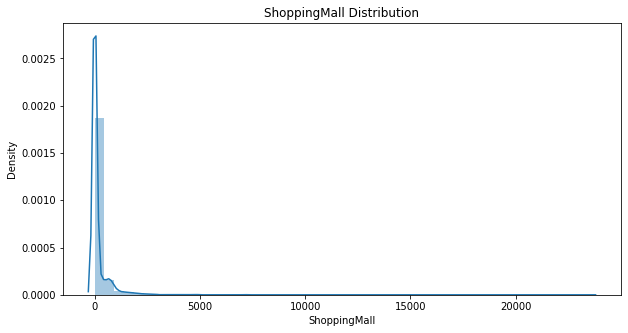

In [16]:
plt.figure(figsize=(10,5))
sns.distplot(train_df["ShoppingMall"])
plt.title("ShoppingMall Distribution")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


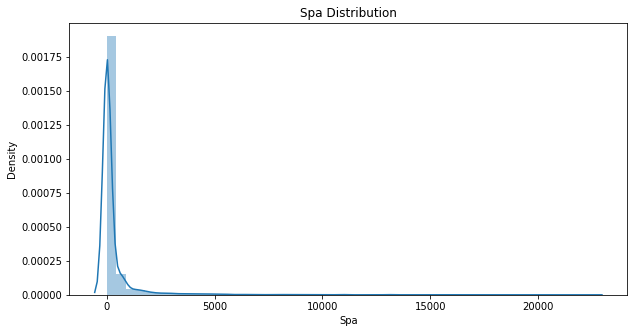

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(train_df["Spa"])
plt.title("Spa Distribution")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


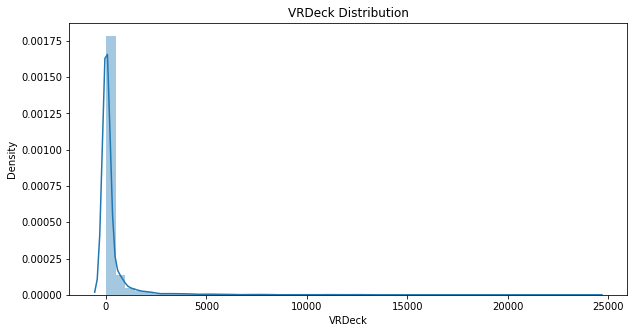

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(train_df["VRDeck"])
plt.title("VRDeck Distribution")
plt.show()

### EDA : Numerical Cols - Test Set

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


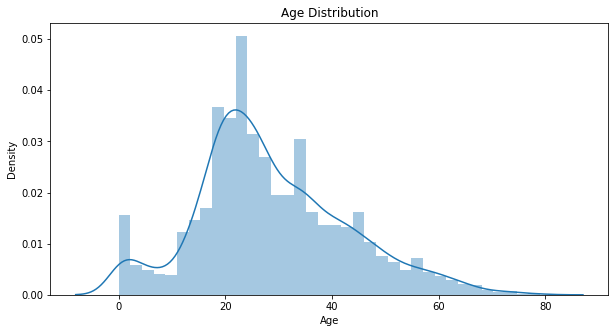

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(test_df["Age"])
plt.title("Age Distribution")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


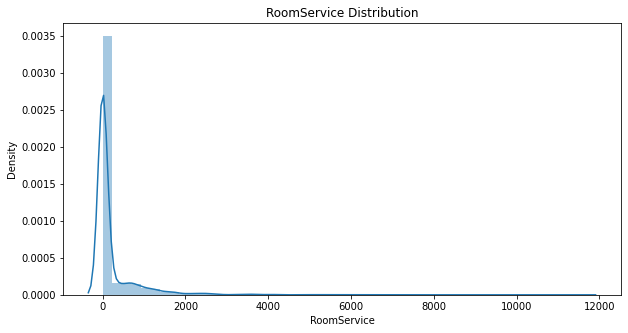

In [20]:
plt.figure(figsize=(10,5))
sns.distplot(test_df["RoomService"])
plt.title("RoomService Distribution")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


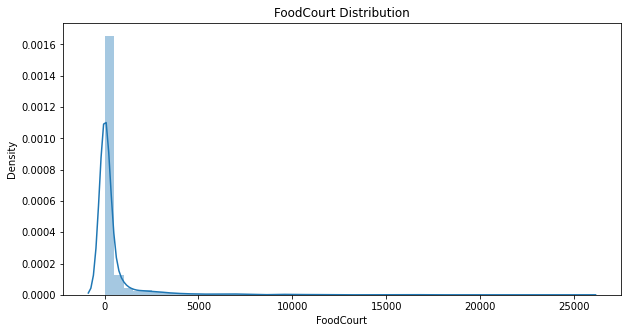

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(test_df["FoodCourt"])
plt.title("FoodCourt Distribution")
plt.show()

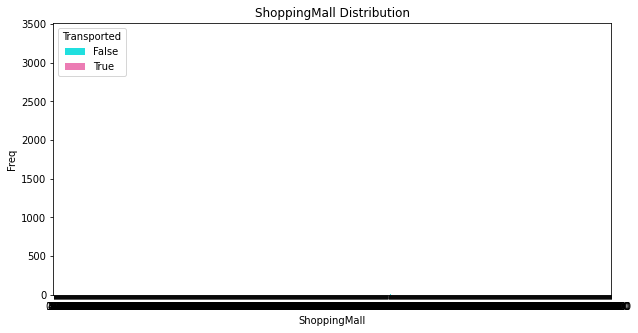

In [22]:
# plt.figure(figsize=(10,5))
# sns.distplot(test_df["ShoppingMall"])
# plt.title("ShoppingMall Distribution")
# plt.show()

plt.figure(figsize=(10,5))
temp = train_df.groupby(["ShoppingMall", "Transported"]).size().reset_index(name="Freq").sort_values(by=["Freq"], ascending=False)
sns.barplot(x="ShoppingMall", hue="Transported", y="Freq", data=temp, palette=["cyan","hotpink"])
plt.title("ShoppingMall Distribution")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


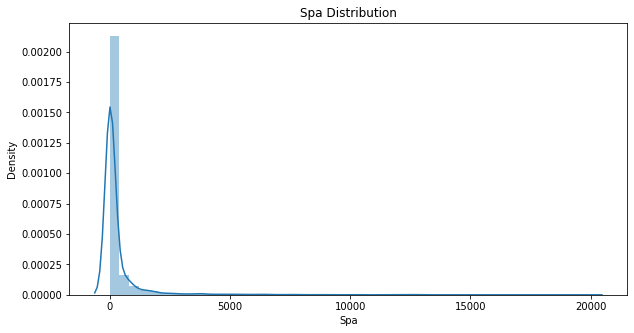

In [23]:
plt.figure(figsize=(10,5))
sns.distplot(test_df["Spa"])
plt.title("Spa Distribution")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


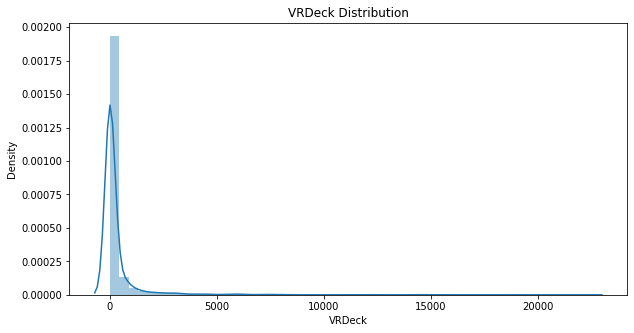

In [24]:
plt.figure(figsize=(10,5))
sns.distplot(test_df["VRDeck"])
plt.title("VRDeck Distribution")
plt.show()

### EDA: Categorical Cols - Train Set

In [25]:
train_df.select_dtypes(include="object").columns.tolist()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [26]:
test_df.select_dtypes(include="object").columns.tolist()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [27]:
train_df["PassengerId"].value_counts()

0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64

In [28]:
train_df["Name"].value_counts()

Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: Name, Length: 8473, dtype: int64

In [29]:
train_df["Cabin"].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

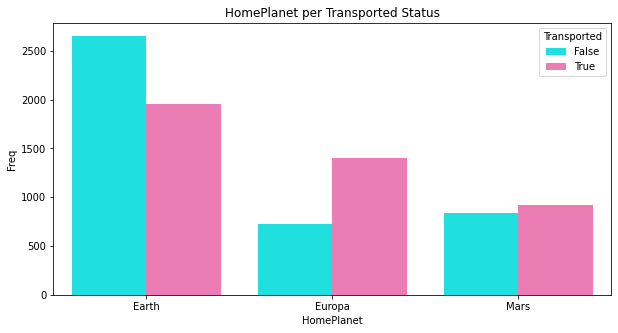

In [30]:
plt.figure(figsize=(10,5))
temp = train_df.groupby(["HomePlanet", "Transported"]).size().reset_index(name="Freq").sort_values(by=["Freq"], ascending=False)
sns.barplot(x="HomePlanet", hue="Transported", y="Freq", data=temp, palette=["cyan","hotpink"])
plt.title("HomePlanet per Transported Status")
plt.show()

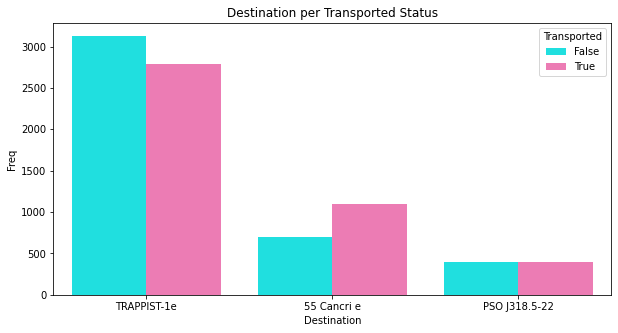

In [31]:
plt.figure(figsize=(10,5))
temp = train_df.groupby(["Destination", "Transported"]).size().reset_index(name="Freq").sort_values(by=["Freq"], ascending=False)
sns.barplot(x="Destination", hue="Transported", y="Freq", data=temp, palette=["cyan","hotpink"])
plt.title("Destination per Transported Status")
plt.show()

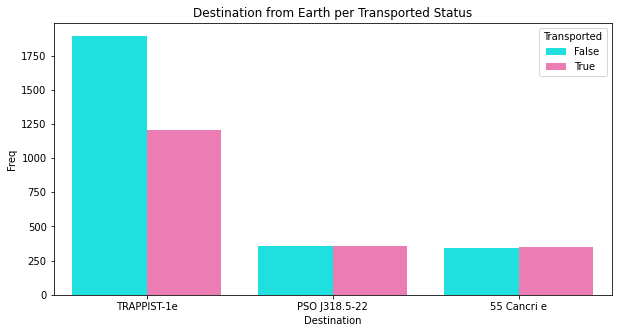

In [32]:
plt.figure(figsize=(10,5))
temp = train_df[train_df["HomePlanet"] == "Earth"].groupby(["Destination", "Transported"]).size().reset_index(name="Freq").sort_values(by=["Freq"], ascending=False)
sns.barplot(x="Destination", hue="Transported", y="Freq", data=temp, palette=["cyan","hotpink"])
plt.title("Destination from Earth per Transported Status")
plt.show()

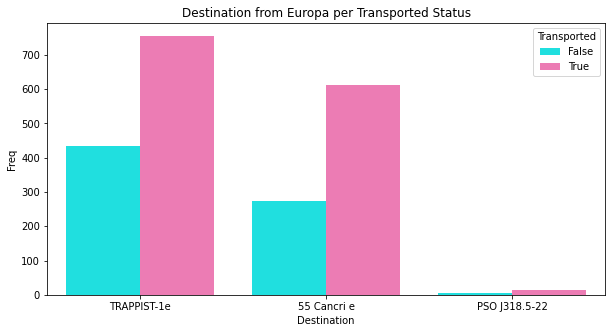

In [33]:
plt.figure(figsize=(10,5))
temp = train_df[train_df["HomePlanet"] == "Europa"].groupby(["Destination", "Transported"]).size().reset_index(name="Freq").sort_values(by=["Freq"], ascending=False)
sns.barplot(x="Destination", hue="Transported", y="Freq", data=temp, palette=["cyan","hotpink"])
plt.title("Destination from Europa per Transported Status")
plt.show()

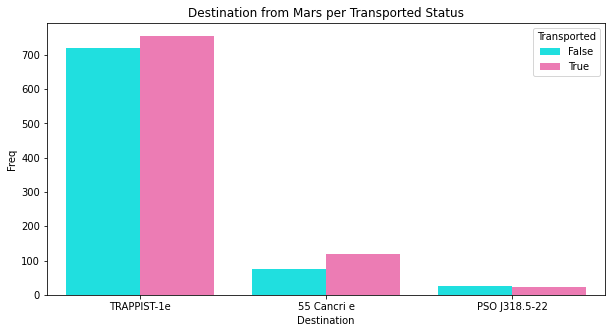

In [34]:
plt.figure(figsize=(10,5))
temp = train_df[train_df["HomePlanet"] == "Mars"].groupby(["Destination", "Transported"]).size().reset_index(name="Freq").sort_values(by=["Freq"], ascending=False)
sns.barplot(x="Destination", hue="Transported", y="Freq", data=temp, palette=["cyan","hotpink"])
plt.title("Destination from Mars per Transported Status")
plt.show()

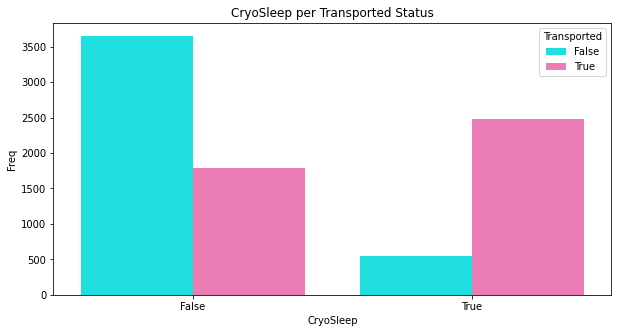

In [35]:
plt.figure(figsize=(10,5))
temp = train_df.groupby(["CryoSleep", "Transported"]).size().reset_index(name="Freq").sort_values(by=["Freq"], ascending=False)
sns.barplot(x="CryoSleep", hue="Transported", y="Freq", data=temp, palette=["cyan","hotpink"])
plt.title("CryoSleep per Transported Status")
plt.show()

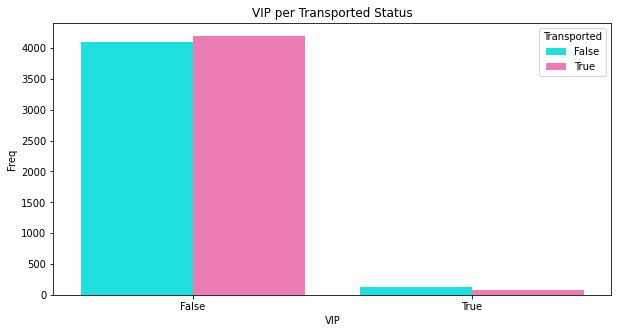

In [36]:
plt.figure(figsize=(10,5))
temp = train_df.groupby(["VIP", "Transported"]).size().reset_index(name="Freq").sort_values(by=["Freq"], ascending=False)
sns.barplot(x="VIP", hue="Transported", y="Freq", data=temp, palette=["cyan","hotpink"])
plt.title("VIP per Transported Status")
plt.show()

### EDA: Categorical Cols - Test Set

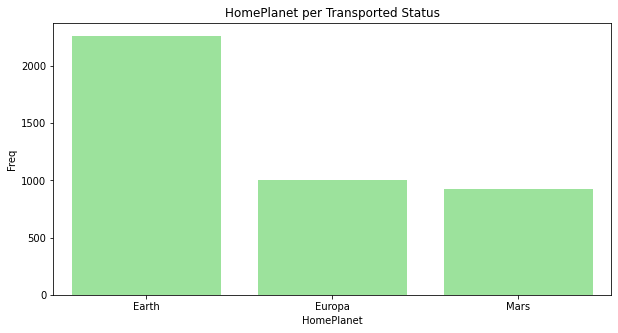

In [37]:
plt.figure(figsize=(10,5))
temp = test_df.groupby(["HomePlanet"]).size().reset_index(name="Freq").sort_values(by=["Freq"], ascending=False)
sns.barplot(x="HomePlanet", y="Freq", data=temp, palette=["lightgreen"])
plt.title("HomePlanet per Transported Status")
plt.show()

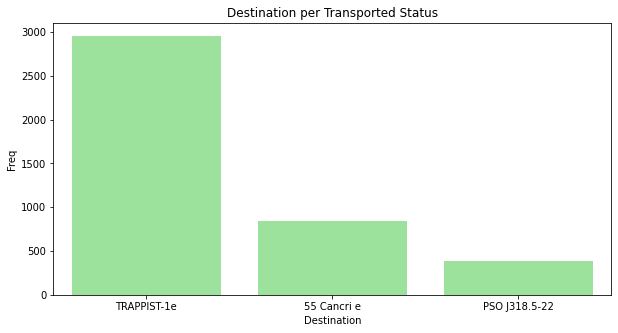

In [38]:
plt.figure(figsize=(10,5))
temp = test_df.groupby(["Destination"]).size().reset_index(name="Freq").sort_values(by=["Freq"], ascending=False)
sns.barplot(x="Destination", y="Freq", data=temp, palette=["lightgreen"])
plt.title("Destination per Transported Status")
plt.show()

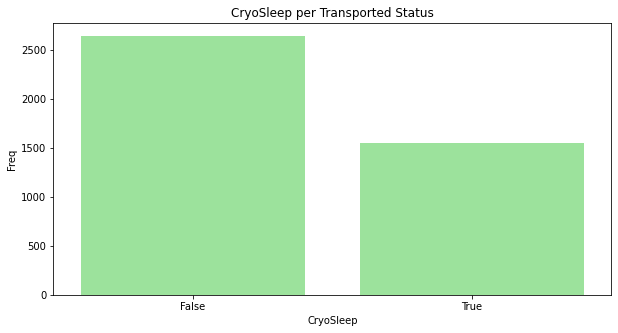

In [39]:
plt.figure(figsize=(10,5))
temp = test_df.groupby(["CryoSleep"]).size().reset_index(name="Freq").sort_values(by=["Freq"], ascending=False)
sns.barplot(x="CryoSleep", y="Freq", data=temp, palette=["lightgreen"])
plt.title("CryoSleep per Transported Status")
plt.show()

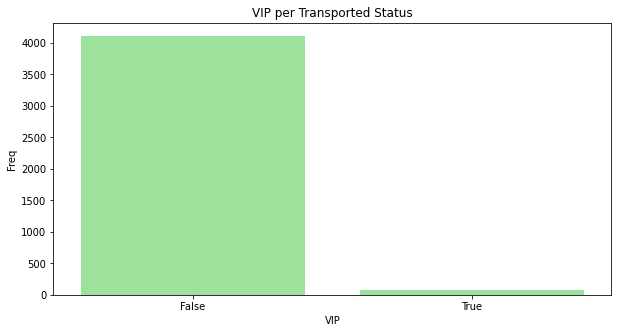

In [40]:
plt.figure(figsize=(10,5))
temp = test_df.groupby(["VIP"]).size().reset_index(name="Freq").sort_values(by=["Freq"], ascending=False)
sns.barplot(x="VIP", y="Freq", data=temp, palette=["lightgreen"])
plt.title("VIP per Transported Status")
plt.show()

### EDA : Check Correlation

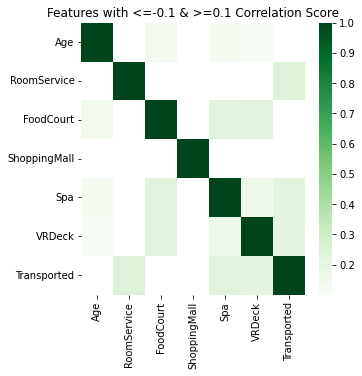

In [41]:
corr = train_df.corr().abs()
kot = corr[(corr>=.1) | (corr<=-.1)]
plt.figure(figsize=(5,5))
sns.heatmap(kot, cmap="Greens")
plt.title("Features with <=-0.1 & >=0.1 Correlation Score")
plt.show()

# 

In [42]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Feature Engineering

In [43]:
temp = []
for i in train_df["PassengerId"]:
    temp.append(i.split("_")[0])
train_df["Group"] = temp

temp = []
for i in train_df["Cabin"]:
    if pd.isnull(i):
        temp.append(np.nan)
    else:
        temp.append(str(i).split("/")[0])
train_df["Deck"] = temp

temp = []
for i in train_df["Cabin"]:
    if pd.isnull(i):
        temp.append(np.nan)
    else:
        temp.append(str(i).split("/")[1])
train_df["Num"] = temp

temp = []
for i in train_df["Cabin"]:
    if pd.isnull(i):
        temp.append(np.nan)
    else:
        temp.append(str(i).split("/")[2])
train_df["Side"] = temp



temp = []
for i in test_df["PassengerId"]:
    if pd.isnull(i):
        temp.append(np.nan)
    else:
        temp.append(i.split("_")[0])
test_df["Group"] = temp

temp = []
for i in test_df["Cabin"]:
    if pd.isnull(i):
        temp.append(np.nan)
    else:
        temp.append(str(i).split("/")[0])
test_df["Deck"] = temp

temp = []
for i in test_df["Cabin"]:
    if pd.isnull(i):
        temp.append(np.nan)
    else:
        temp.append(str(i).split("/")[1])
test_df["Num"] = temp

temp = []
for i in test_df["Cabin"]:
    if pd.isnull(i):
        temp.append(np.nan)
    else:
        temp.append(str(i).split("/")[2])
test_df["Side"] = temp

In [44]:
train_df.groupby(["Group"]).size().reset_index(name="Freq").sort_values(by=["Freq"], ascending=False)

,Group,Freq
3023,4498,8
5487,8168,8
5851,8728,8
5893,8796,8
6000,8956,8
...,...,...
2334,3483,1
2333,3480,1
2332,3478,1
2328,3473,1


In [45]:
temp = train_df.groupby(["Group"]).size().reset_index(name="Freq").sort_values(by=["Freq"], ascending=False)
temp["IsFamily"] = np.where(temp["Freq"] > 0, 1, 0)
train_df = pd.merge(train_df, temp[["Group", "IsFamily"]], on="Group", how="left")

temp = test_df.groupby(["Group"]).size().reset_index(name="Freq").sort_values(by=["Freq"], ascending=False)
temp["IsFamily"] = np.where(temp["Freq"] > 0, 1, 0)
test_df = pd.merge(test_df, temp[["Group", "IsFamily"]], on="Group", how="left")

In [46]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Group             0
Deck            199
Num             199
Side            199
IsFamily          0
dtype: int64

In [47]:
categorical_cols = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP', 'Deck', 'Side']
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for i in categorical_cols:
    train_df[str(i)] = train_df[str(i)].fillna(train_df[str(i)].mode().values[0])
    test_df[str(i)] = test_df[str(i)].fillna(test_df[str(i)].mode().values[0])
for i in numerical_cols:
    train_df[str(i)] = train_df[str(i)].fillna(train_df[str(i)].mean())
    test_df[str(i)] = test_df[str(i)].fillna(test_df[str(i)].mean())

In [48]:
train_df["Num"] = train_df["Num"].fillna(train_df["Num"].mode().values[0]).astype("int")
test_df["Num"] = test_df["Num"].fillna(test_df["Num"].mode().values[0]).astype("int")

In [49]:
train_df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Group             0
Deck              0
Num               0
Side              0
IsFamily          0
dtype: int64

In [50]:
# train_df["RoomService"] = np.log1p(train_df["RoomService"])
# train_df["Spa"] = np.log1p(train_df["Spa"])
# train_df["VRDeck"] = np.log1p(train_df["VRDeck"])

# test_df["RoomService"] = np.log1p(test_df["RoomService"])
# test_df["Spa"] = np.log1p(test_df["Spa"])
# test_df["VRDeck"] = np.log1p(test_df["VRDeck"])

In [51]:
categorical_cols

['HomePlanet', 'Destination', 'CryoSleep', 'VIP', 'Deck', 'Side']

In [52]:
train_df = pd.get_dummies(train_df, columns=categorical_cols)
test_df = pd.get_dummies(test_df, columns=categorical_cols)

In [53]:
numerical_cols

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [54]:
train_df["TotalExpenses"] = train_df["RoomService"] + train_df["FoodCourt"] + train_df["ShoppingMall"] + train_df["Spa"] + train_df["VRDeck"]
test_df["TotalExpenses"] = test_df["RoomService"] + test_df["FoodCourt"] + test_df["ShoppingMall"] + test_df["Spa"] + test_df["VRDeck"]

In [55]:
# sc = MinMaxScaler()
# for col in numerical_cols:
#     train_df[col] = sc.fit_transform(np.array(train_df[col]).reshape(-1,1))
#     test_df[col] = sc.transform(np.array(test_df[col]).reshape(-1,1))

In [56]:
# drop out the passenger identifiers
# train_df = train_df.drop(["PassengerId", "Name", "Cabin", "Group", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], axis=1)
# test_df = test_df.drop(["PassengerId", "Name", "Cabin", "Group", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], axis=1)
train_df = train_df.drop(["PassengerId", "Name", "Cabin", "Group"], axis=1)
test_df = test_df.drop(["PassengerId", "Name", "Cabin", "Group"], axis=1)

In [57]:
train_df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,IsFamily,HomePlanet_Earth,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,TotalExpenses
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0,1,0,...,1,0,0,0,0,0,0,1,0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,0,1,1,...,0,0,0,0,1,0,0,0,1,736.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,...,0,0,0,0,0,0,0,0,1,10383.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,...,0,0,0,0,0,0,0,0,1,5176.0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1,1,1,...,0,0,0,0,1,0,0,0,1,1091.0


In [58]:
test_df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,IsFamily,HomePlanet_Earth,HomePlanet_Europa,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,TotalExpenses
0,27.0,0.0,0.0,0.0,0.0,0.0,3,1,1,0,...,0,0,0,0,0,1,0,0,1,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0,4,1,1,0,...,0,0,0,0,1,0,0,0,1,2832.0
2,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0.0
3,38.0,0.0,6652.0,0.0,181.0,585.0,1,1,0,1,...,0,1,0,0,0,0,0,0,1,7418.0
4,20.0,10.0,0.0,635.0,0.0,0.0,5,1,1,0,...,0,0,0,0,1,0,0,0,1,645.0


# Model Training

### Model Training: Split Training Set & Encode Target Y

In [59]:
X = train_df.drop(["Transported"], axis=1)
y = train_df["Transported"]

le = LabelEncoder()
y = le.fit_transform(y)
print(le.classes_)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

[False  True]
(6954, 29) (6954,) (1739, 29) (1739,)


### Model Training: All Algorithms & Evaluation Score

In [60]:
X_train.isna().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Num                          0
IsFamily                     0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
CryoSleep_False              0
CryoSleep_True               0
VIP_False                    0
VIP_True                     0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
TotalExpenses                0
dtype: int64

In [61]:
X_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,IsFamily,HomePlanet_Earth,HomePlanet_Europa,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,TotalExpenses
3293,29.0,0.0,10.0,0.0,0.0,715.0,733,1,1,0,...,0,0,0,0,1,0,0,1,0,725.0
4858,0.0,0.0,0.0,0.0,0.0,0.0,837,1,1,0,...,0,0,0,0,0,1,0,1,0,0.0
4782,16.0,0.0,0.0,0.0,0.0,0.0,82,1,1,0,...,0,0,0,0,1,0,0,0,1,0.0
3654,42.0,0.0,1249.0,0.0,1313.0,1148.0,142,1,0,1,...,0,1,0,0,0,0,0,0,1,3710.0
6550,40.0,0.0,120.0,0.0,2814.0,318.0,221,1,0,1,...,0,1,0,0,0,0,0,1,0,3252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228,18.0,0.0,0.0,0.0,0.0,0.0,892,1,1,0,...,0,0,0,0,0,1,0,1,0,0.0
7500,26.0,0.0,0.0,0.0,0.0,0.0,249,1,0,1,...,0,0,1,0,0,0,0,1,0,0.0
5120,32.0,0.0,0.0,0.0,0.0,0.0,208,1,0,1,...,1,0,0,0,0,0,0,0,1,0.0
2287,16.0,0.0,0.0,0.0,0.0,0.0,400,1,1,0,...,0,0,0,0,0,1,0,1,0,0.0


In [62]:
y_train

array([0, 1, 1, ..., 1, 1, 0])

In [63]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg_pred = lg.predict(X_test)
print(round(accuracy_score(y_test, lg_pred), 3))

0.782


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [64]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print(round(accuracy_score(y_test, dt_pred), 3))

0.74


In [65]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(round(accuracy_score(y_test, rf_pred), 3))

0.79


In [66]:
X_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,IsFamily,HomePlanet_Earth,HomePlanet_Europa,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,TotalExpenses
3293,29.0,0.0,10.0,0.0,0.0,715.0,733,1,1,0,...,0,0,0,0,1,0,0,1,0,725.0
4858,0.0,0.0,0.0,0.0,0.0,0.0,837,1,1,0,...,0,0,0,0,0,1,0,1,0,0.0
4782,16.0,0.0,0.0,0.0,0.0,0.0,82,1,1,0,...,0,0,0,0,1,0,0,0,1,0.0
3654,42.0,0.0,1249.0,0.0,1313.0,1148.0,142,1,0,1,...,0,1,0,0,0,0,0,0,1,3710.0
6550,40.0,0.0,120.0,0.0,2814.0,318.0,221,1,0,1,...,0,1,0,0,0,0,0,1,0,3252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228,18.0,0.0,0.0,0.0,0.0,0.0,892,1,1,0,...,0,0,0,0,0,1,0,1,0,0.0
7500,26.0,0.0,0.0,0.0,0.0,0.0,249,1,0,1,...,0,0,1,0,0,0,0,1,0,0.0
5120,32.0,0.0,0.0,0.0,0.0,0.0,208,1,0,1,...,1,0,0,0,0,0,0,0,1,0.0
2287,16.0,0.0,0.0,0.0,0.0,0.0,400,1,1,0,...,0,0,0,0,0,1,0,1,0,0.0


In [67]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print(round(accuracy_score(y_test, xgb_pred), 3))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:57:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.786


In [68]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_test)
print(round(accuracy_score(y_test, lgb_pred), 3))

0.798


# Prediction

In [69]:
final_pred = lgb.predict(test_df)
final_pred = le.inverse_transform(final_pred)
sub_df["Transported"] = final_pred
sub_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [70]:
sub_df.to_csv("submission_lgb_804.csv", index=False)